<a href="https://colab.research.google.com/github/mvmorr/CE888_Assignment2/blob/master/Races_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load, prepare and inspect the datasets

Races datasets with 65% imbalanced


In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, permutation_test_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [0]:
data = pd.read_csv("races.csv")
data.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1,time2,time3,time4,time5,time6,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,NaN,NaN,NaN,NaN,24.05,46.69,70.39,NaN,NaN,NaN,NaN,5,13,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,4,13.77,22.22,24.88,22.82,NaN,NaN,NaN,13.77,35.99,60.87,83.69,NaN,NaN,NaN,11,1,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,1,24.33,22.47,22.09,NaN,NaN,NaN,NaN,24.33,46.80,68.89,NaN,NaN,NaN,NaN,5,3,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,4,25.45,23.52,23.31,23.56,NaN,NaN,NaN,25.45,48.97,72.28,95.84,NaN,NaN,NaN,2,10,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [0]:
data.drop(['date', 'sec_time4', 'sec_time5','sec_time6','sec_time7','time4','time5','time6','time7', 'place_combination3','place_combination4', 'place_dividend3','place_dividend4', 'win_combination2', 'win_dividend2'],axis=1, inplace=True)
data.head()

,race_id,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,time1,time2,time3,place_combination1,place_combination2,place_dividend1,place_dividend2,win_combination1,win_dividend1
0,0,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,36.5,25.5,8,121.0
1,1,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,12.5,47.0,5,23.5
2,2,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,4,13.77,22.22,24.88,13.77,35.99,60.87,11,1,23.0,23.0,11,70.0
3,3,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,1,24.33,22.47,22.09,24.33,46.80,68.89,5,3,14.0,24.5,5,52.0
4,4,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,4,25.45,23.52,23.31,25.45,48.97,72.28,2,10,15.5,28.0,2,36.5


In [0]:
data = data.fillna(0)

In [0]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,race_id,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,time1,time2,time3,place_combination1,place_combination2,place_dividend1,place_dividend2,win_combination1,win_dividend1
0,0,1,0,0,0,2,2,14,1,5,96,103,216,96,173,317,7,10,53,31,7,221
1,1,1,1,0,0,1,2,14,1,5,292,200,192,292,652,959,4,12,5,74,4,26
2,2,1,2,0,0,2,2,17,8,4,120,159,310,120,260,497,10,0,26,26,10,119
3,3,1,3,0,0,1,2,11,44,1,320,184,33,320,663,810,4,2,8,29,4,83
4,4,1,4,0,0,3,2,17,8,4,415,287,153,415,874,1140,1,9,11,36,1,52


In [0]:
X = data.drop(['going'], axis=1)
y = data.going

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   race_id             6349 non-null   int64
 1   venue               6349 non-null   int64
 2   race_no             6349 non-null   int64
 3   config              6349 non-null   int64
 4   surface             6349 non-null   int64
 5   distance            6349 non-null   int64
 6   going               6349 non-null   int64
 7   horse_ratings       6349 non-null   int64
 8   prize               6349 non-null   int64
 9   race_class          6349 non-null   int64
 10  sec_time1           6349 non-null   int64
 11  sec_time2           6349 non-null   int64
 12  sec_time3           6349 non-null   int64
 13  time1               6349 non-null   int64
 14  time2               6349 non-null   int64
 15  time3               6349 non-null   int64
 16  place_combination1  6349 non-null   int64


In [0]:
X.shape, y.shape

((6349, 21), (6349,))

In [0]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y)
scores.mean()

0.12048398205543456

In [0]:
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y)
scores.mean()

-0.2019569433582355

Stratified Cross Validation, Elbow and Silhouette method


In [0]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [0]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [0]:
def silhouette(X_train, n_clusters):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
  # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_train)
  print(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
  silhouette_avg = silhouette_score(X_train, cluster_labels)
  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
  centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

  plt.show()


In [0]:

X_train = []
X_test = []
y_train = []
y_test = []
k_centers = []
# train_index, test_index = next(iter(skf.split(X,y)))
for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  X_train.append(X.iloc[train_index])
  X_test.append(X.iloc[test_index])
  y_train.append(y.iloc[train_index])
  y_test.append(y.iloc[test_index])

Train: [ 624  625  626 ... 6346 6347 6348] Test: [   0    1    2 ... 3046 3047 3744]
Train: [   0    1    2 ... 6346 6347 6348] Test: [ 624  625  626 ... 4022 4557 4558]
Train: [   0    1    2 ... 6346 6347 6348] Test: [ 709  710  712 ... 4561 4562 4564]
Train: [   0    1    2 ... 6346 6347 6348] Test: [ 713 1352 1353 ... 5403 5404 5405]
Train: [   0    1    2 ... 5403 5404 5405] Test: [1422 1488 2861 ... 6346 6347 6348]


In [0]:
def elbow_method(train, i):
  means = KMeans(n_clusters=i)
  means.fit(train)
  return means.inertia_

In [0]:
def measure_minority_class(labels, true_labels):
  count = 0
  total = 0
  for i in range(len(labels)):
    if true_labels[i] == 1: 
      total += 1
      if true_labels[i] == labels[i]:
        count+=1
  print("Complete Minority:",count/total)
  if count/total != 1:
    return True
  return False

[0 0 0 ... 1 1 1]
For n_clusters = 2 The average silhouette_score is : 0.5516275084621658


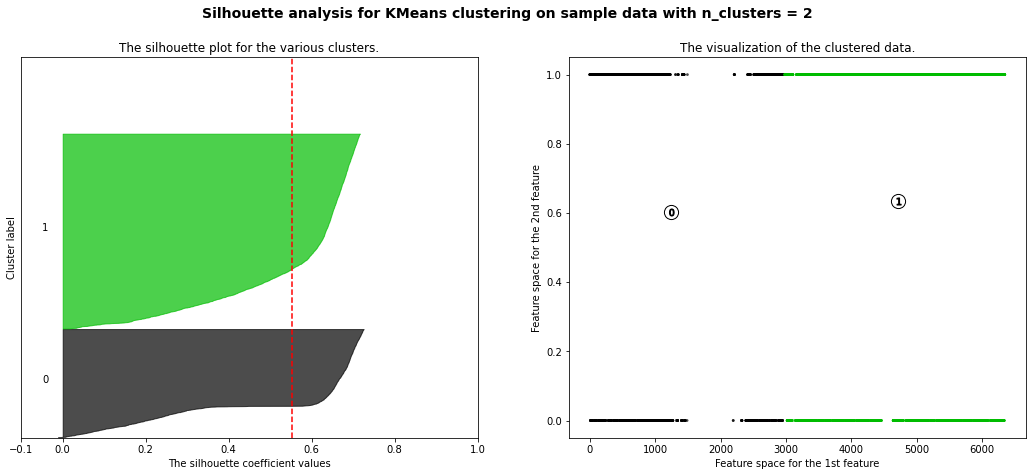

Complete Minority: 0.612913003940588
[1 1 1 ... 0 0 0]
For n_clusters = 3 The average silhouette_score is : 0.46851102489404334


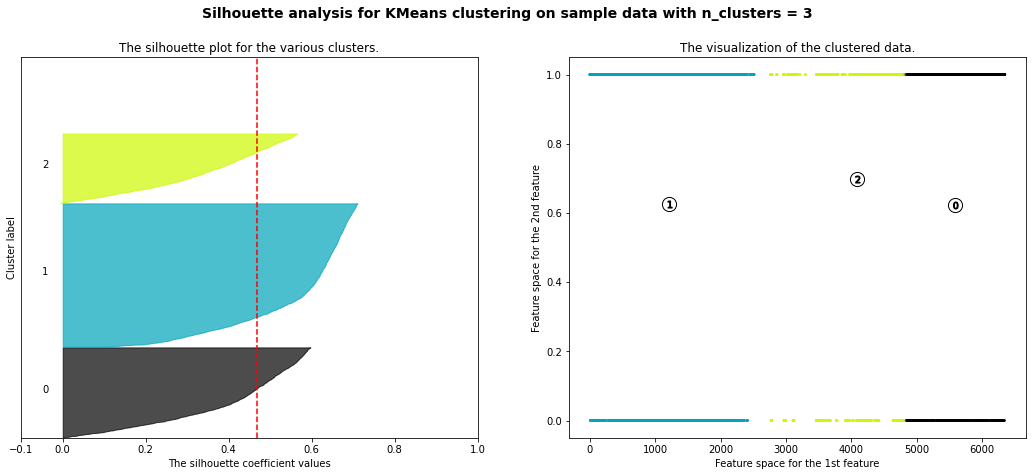

Complete Minority: 0.4998484389208851
[1 1 1 ... 2 2 2]
For n_clusters = 4 The average silhouette_score is : 0.39591520330403657


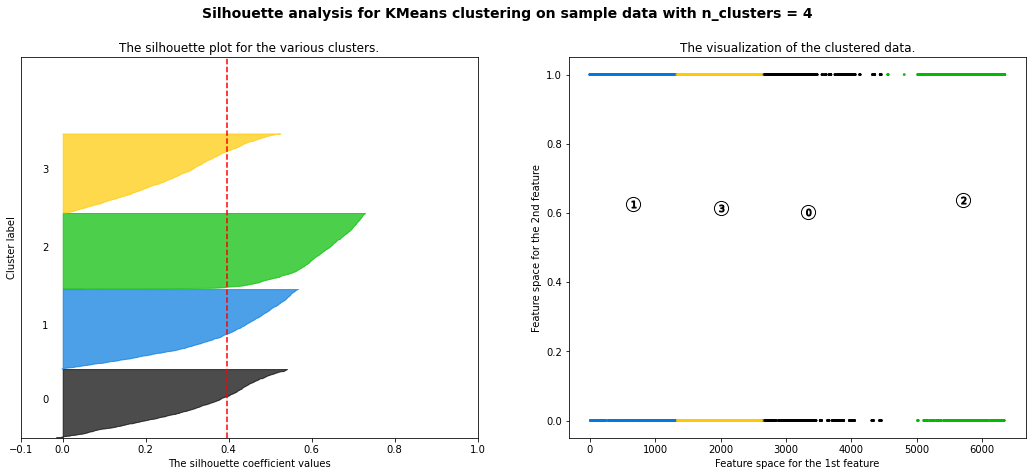

Complete Minority: 0.2501516070345664
[0 0 0 ... 1 1 1]
For n_clusters = 5 The average silhouette_score is : 0.3328571283886881


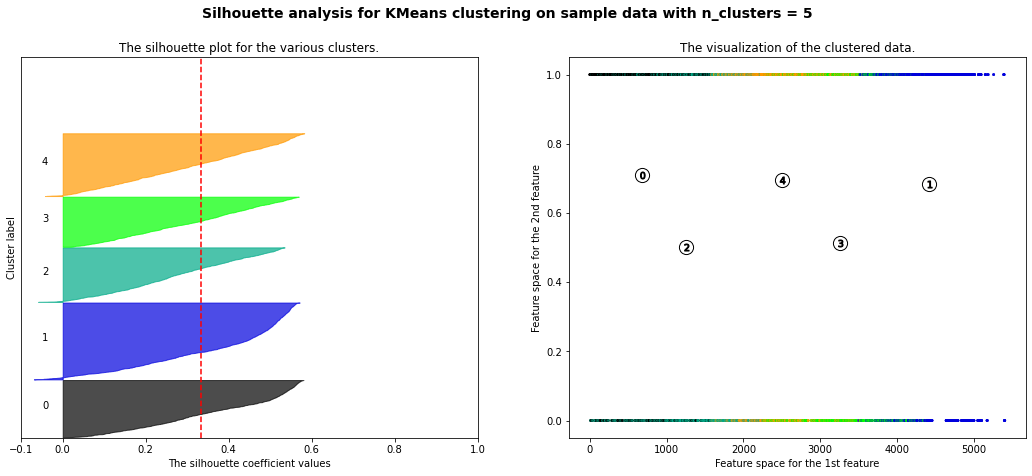

Complete Minority: 0.5285021224984839


In [0]:
rm = RandomForestRegressor()
count = 1
Sum_of_squared_distances = []
final_clustering = []
for i in range(len(X_train)):
  if count > 1:
    silhouette(X_train[i], count)
    km = KMeans(n_clusters=2)
    km.fit(X_train[i])
    final_clustering.append(km.labels_)
    if measure_minority_class(km.labels_, y_train[i].values):
      rm.fit(X_train[i], y_train[i])
    Sum_of_squared_distances.append(elbow_method(X_train[i], count))
  count+=1

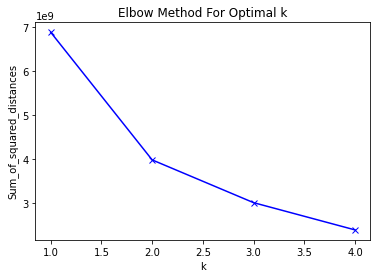

In [0]:
K = range(1,5)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
score_average = []
for j in range(len(X_test)):
  score, perm, pvalue = permutation_test_score(rm, X_test[j], y_test[j], cv=10, n_permutations=10)
  print(score)
  print(perm)
  print(pvalue)
  score_average.append(score)

-0.7673729473032445
[-0.34255315 -0.1708304  -0.13462833 -0.1680194  -0.48786511 -0.30996533
 -0.11216977 -0.38127023 -0.97502474 -0.24127594]
0.9090909090909091
-0.14762310271147977
[-0.0952919  -0.8882695  -0.10852241 -0.46354911 -0.2364353  -1.10137305
 -0.20201216 -0.16210555 -0.33499204 -1.74383468]
0.2727272727272727
-0.5810583779559071
[-0.17605346 -0.27405921 -0.16031104 -0.27264062 -0.75607922 -0.29152798
 -0.19695391 -0.27851369 -0.23468282 -0.59407495]
0.8181818181818182
-0.261778490152632
[-0.09762046 -0.178817   -0.21943735 -0.1969195  -0.81933129 -0.16427321
 -0.12399538 -0.19175956 -0.12813571 -2.42165867]
0.8181818181818182
-0.750335863404385
[-0.35449344 -0.10343108 -0.39028099 -0.19832951 -0.1891012  -0.16670029
 -0.2170446  -0.15608657 -0.57685658 -0.15566434]
1.0


In [0]:
for k in range(len(score_average)):
  print(score_average[k])

-0.7673729473032445
-0.14762310271147977
-0.5810583779559071
-0.261778490152632
-0.750335863404385


In [0]:
print(np.array(score_average).mean())
print(scores.mean())

-0.5016337563055296
-0.2019569433582355


In [0]:
print(score_average)

[-0.7673729473032445, -0.14762310271147977, -0.5810583779559071, -0.261778490152632, -0.750335863404385]


In [0]:
np.array(score_average).std()

0.25362666176535925

{'boxes': [<matplotlib.lines.Line2D at 0x7f859e792390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f859e792da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f859e79dba8>,
 'means': [<matplotlib.lines.Line2D at 0x7f859e79d860>,
 'medians': [<matplotlib.lines.Line2D at 0x7f859e79d4e0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f859e7926a0>,
  <matplotlib.lines.Line2D at 0x7f859e7a96a0>]}

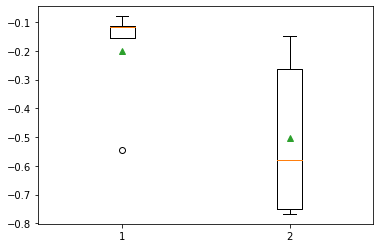

In [0]:
fig, ax = plt.subplots()
ax.boxplot([scores, score_average], showmeans=True)